In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import time

In [10]:
from calculate_chi_func import chiCalc_custom

In [11]:
# Parameters of the control field
nN = 8 # Number of pi pulses
t1_vec = np.arange(0.1,1.5,0.002) # time vector for t1 [µs] # t1_vec = np.arange(0.1,2,0.002)
totT_vec = 2*nN*t1_vec # total time vector [µs]
print('number of points =',len(t1_vec))

# NSD function
def funcGauss(x,y0,a,xc,w):
    return y0+a*np.exp(-0.5*((x-2*np.pi*xc)/(2*np.pi*w))**2) #I included a couple of 2*np.pi to convert \nu->

def funcNoise(x,y0,a1,x1,w1): 
    return y0 + funcGauss(x,0,a1,x1,w1) #+ funcGauss(x,0,a2,x2,w2) + funcGauss(x,0,a3,x3,w3) + funcGauss(x,0,a4,x4,w4)

## NSD parameters
#νl_exp = 403.6*1.0705e-3 # B*\gamma [MHZ]
#para_exp = np.array([0.00119,0.52,νl_exp,0.0042]) # [offset, amplitude, center, width] all in MHz

## Function to calculate the distribution of pi pulses for a CPMG sequence
def cpmg(t1,nN):
    seq = np.ones(nN+1)*2*t1
    seq[0] = t1
    seq[-1] = t1 # [-1] indica l'elemento finale del vettore
    return seq

number of points = 700


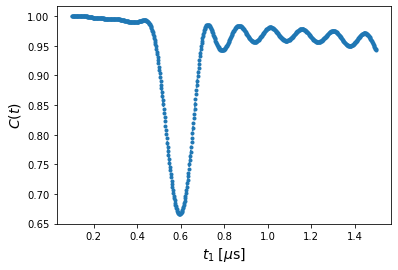

Wall time: 4.4 s


In [13]:
%%time 
# N.B.: %%time è un comando speciale (cell magic) per la valutazione del tempo di calcolo

showPlot = True #False #
saveData = False #True #

# NSD parameters
νl = 403.6*1.0705e-3 # B*\gamma [MHZ]
para = np.array([0.00119,0.52,νl,0.0042]) # [offset, amplitude, center, width] all in MHz

## Calculate chi at every total time
chi = np.zeros(len(totT_vec))

for i,totT in enumerate(totT_vec):
    
    ## Time between pulses
    t1 = totT/(2*nN)
    
    ## pi pulses distribution
    pulses_times = cpmg(t1,nN).cumsum()[:-1] # [:-1] <--- del vettore considerato si prendono tutti i valori all'infuori dell'ultimo
    
    ## Calculate chi
    chi[i] = chiCalc_custom(funcNoise,para,totT,pulses_times)

if showPlot:
    plt.plot(t1_vec,np.exp(-chi),'.:',ms=6)
    plt.xlabel(r'$t_1 \; [\mu{\rm s}]$',fontsize=14)
    plt.ylabel(r'$C(t)$',fontsize=14)
    plt.show()

if saveData:
    timestr = time.strftime("%Y%m%d-%H%M%S")
    filename = './data_t1-0.1-5us_n-'+str(nN)+'_'+timestr+'.dat'
    np.savetxt(filename,np.exp(-chi))

In [14]:
noise_parameters = 4;
x = 10 #number of points for each parameter
print('total simulation time',4.4*x**noise_parameters/60/60,'hrs')

total simulation time 12.222222222222223 hrs


Total time: $T = 2 N t_1$

Frequency: $\nu_l = \frac{1}{4 t_1}$

```y0``` $\equiv$ offset 

```a``` $\equiv$ amplitude

```x1``` $\equiv$ center ; ```x1``` $= B*1.0705e^{-3}$

$B$ $\equiv$ static magnetic field

```w1``` $\equiv$ width $(\sigma)$

```y0``` $\in [0.0005; 0.01]$ corrisponde a $[0.5; 10]$ KHz

```a``` $\in [0.1; 1]$ corrisponde a $[100; 1000]$ KHz

$B \in [50, 1000]$ G corrisponde ad ```x1``` $\in [50; 1000]$ KHz

```w1``` $\in [0.001; 0.01]$ corrisponde a $[1; 10]$ kHz

In [15]:
#1/4/0.2
#1000*1.0705e-3,200*1.0705e-3
#1/4/(1000*1.0705e-3),1/4/(200*1.0705e-3)

In [16]:
#1/4/0.55/1.0705e-3,1/4/0.15/1.0705e-3

In [17]:
#data = np.loadtxt('./data_t1-0.1-5us_n-4_20210302-164516.dat')
#plt.plot(data)